In [46]:
import pandas as pd
import random 
import numpy as np
import re
from scipy.sparse import hstack

In [47]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder


In [78]:
from lightgbm import LGBMClassifier

In [49]:
from pre_processamento import pre_processamento

In [50]:
train = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\train.tsv", sep='\t')
test = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\test.tsv", sep='\t')

In [51]:
train,test = pre_processamento(train,test)

#   Análise estatística

In [52]:
train.head()

,name,item_condition_id,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481661 entries, 0 to 1482534
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   name               1481661 non-null  object 
 1   item_condition_id  1481661 non-null  int64  
 2   brand_name         849325 non-null   object 
 3   price              1481661 non-null  float64
 4   shipping           1481661 non-null  int64  
 5   item_description   1481657 non-null  object 
 6   stock              1481661 non-null  int32  
 7   gen_cat            1481661 non-null  object 
 8   sub1_cat           1481661 non-null  object 
 9   sub2_cat           1481661 non-null  object 
 10  datetime_month     1474770 non-null  float64
 11  datetime_year      1474770 non-null  float64
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 141.3+ MB


In [54]:
train.head()

,name,item_condition_id,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [55]:
train.describe()

,item_condition_id,price,shipping,stock,datetime_month,datetime_year
count,1.481661e+06,1.481661e+06,1.481661e+06,1.481661e+06,1.474770e+06,1474770.0
mean,1.907322e+00,2.675329e+01,4.473257e-01,1.178550e+01,6.517894e+00,2018.0
std,9.031759e-01,3.859198e+01,4.972178e-01,1.056099e+01,3.194489e+00,0.0
min,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2018.0
25%,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,4.000000e+00,2018.0
50%,2.000000e+00,1.700000e+01,0.000000e+00,9.000000e+00,7.000000e+00,2018.0
75%,3.000000e+00,2.900000e+01,1.000000e+00,1.700000e+01,9.000000e+00,2018.0
max,5.000000e+00,2.009000e+03,1.000000e+00,9.500000e+01,1.200000e+01,2018.0


In [56]:
train.isnull().sum()  #necessário valair forma de tratar os valores nulos.

name                      0
item_condition_id         0
brand_name           632336
price                     0
shipping                  0
item_description          4
stock                     0
gen_cat                   0
sub1_cat                  0
sub2_cat                  0
datetime_month         6891
datetime_year          6891
dtype: int64

In [57]:
train.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'item_condition_id'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'shipping'}>,
        <AxesSubplot:title={'center':'stock'}>],
       [<AxesSubplot:title={'center':'datetime_month'}>,
        <AxesSubplot:title={'center':'datetime_year'}>]], dtype=object)

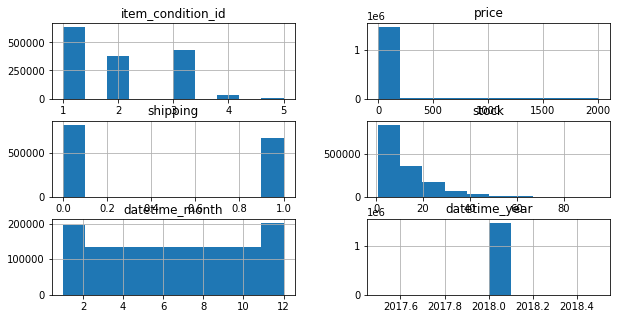

In [58]:
train.hist(figsize=(10,5))

In [59]:
X = train.drop("price", axis = 1)
y = train["price"]

#   Split

In [60]:
#Separação em treino e teste para começarmos as transformaçõs, protegendo nossos dados de validação de possíveis vazamentos. 

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.4, random_state=10) #Divisão em 60/40

<AxesSubplot:>

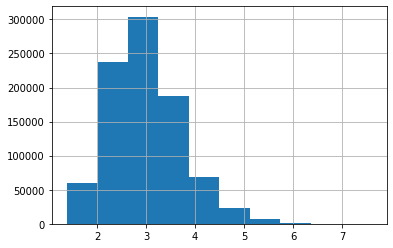

In [61]:
#Normalizando, com log, o target (price), foi realizado de forma separada para nao terem dados vazados.

ytrain =  np.log1p(ytrain)
yval =  np.log1p(yval)
ytrain.hist()

In [62]:
Xtrain.head()

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
285664,Jandals,3,NaN,0,Good condition,1,Women,Shoes,Sandals,4.0,2018.0
685118,Donkey Kong Country 2 Nintendo Game Boy,3,NaN,1,Will work with Nintendo GameBoy Advance SP. Ni...,3,Electronics,Video Games & Consoles,Consoles,8.0,2018.0
974069,NWT Mini hair straightener!,1,NaN,1,It's purple! Price includes half shipping Trav...,11,Beauty,Tools & Accessories,Hair Styling Tools,12.0,2018.0
778919,Sherri Hill prom dress,2,Sherri Hill,1,"Paid over [rm], asking [rm] (willing to negoti...",10,Women,Dresses,Full-Length,5.0,2018.0
1092378,Cardigan Bundle,3,Gap,0,"Two medium cardigans, both size mediums. One f...",17,Women,Sweaters,Cardigan,5.0,2018.0


In [63]:
Xval.head()

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
20170,Swiss Army knife,1,NaN,1,New in original box. Never used.,13,Sports & Outdoors,Outdoors,Hiking & Camping,4.0,2018.0
155565,Dove Soap Mega LOT Assorted,1,Dove,0,(9) 4ct (36 bars total) Dove Soap (5) Febreze ...,1,Other,Daily & Travel items,Personal Care,6.0,2018.0
142735,"LOWEST PRICE, HIGHEST QUALITY BLENDER",1,NaN,1,STOP THROWING YOUR MAKEUP AWAY ! ! * ~ * Newes...,7,Beauty,Tools & Accessories,Makeup Brushes & Tools,1.0,2018.0
709876,Gold aluminum fidget spinner,1,NaN,1,Aluminum fidget spinner: Brand new . Comes in ...,13,Kids,Toys,Games,5.0,2018.0
723286,Duffle bag,3,NaN,0,Used duffle bag Perfect for young girls for tr...,43,Women,Women's Handbags,Totes & Shoppers,2.0,2018.0


#   Pré-processamento

In [64]:
#Função para "separação" de palavras, ex: Can't -> can not, objetivo de facilitar a limpeza, aonde não serão criadas duas palavras para cant/can not.
# Será feito para diversas palavras com a mesma condição.

def text_preprocess(phrase):
    
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase  = re.sub('^no description yet$', '', phrase)
    
    phrase = re.sub('https?://\S+| www.\S+', '', phrase) #Remoção de qualquer site que possa ter no nosso dataset
    phrase  = re.sub('[rm]', '', phrase)
    phrase = re.sub("[^a-zA-Z0-9' \n\.]", '', phrase)  #excluindo tudo o que não for letra e numero.
    
    phrase = re.sub(' +', ' ', phrase) #exclusão de espaços extras, ex: "eu    vou" -> "eu vou"

    phrase = phrase.lower() #passando para letra minúscula.
   
    return phrase

In [65]:
Xtrain["name"] = Xtrain["name"].apply(lambda x: text_preprocess(x))

In [66]:
Xtrain["item_description"] = Xtrain["item_description"].astype(str)

In [67]:
Xtrain["item_description"] = Xtrain["item_description"].apply(lambda x: text_preprocess(x))

In [68]:
Xtrain

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
285664,jandals,3,NaN,0,good condition,1,Women,Shoes,Sandals,4.0,2018.0
685118,donkey kong county 2 nintendo gae boy,3,NaN,1,will wok with nintendo gaeboy advance sp. nint...,3,Electronics,Video Games & Consoles,Consoles,8.0,2018.0
974069,nwt mini hai staightene,1,NaN,1,it is puple pice includes half shipping tavel ...,11,Beauty,Tools & Accessories,Hair Styling Tools,12.0,2018.0
778919,shei hill po dess,2,Sherri Hill,1,paid ove asking willing to negotiate size 8 ta...,10,Women,Dresses,Full-Length,5.0,2018.0
1092378,cadigan bundle,3,Gap,0,two ediu cadigans both size edius. one fo gap ...,17,Women,Sweaters,Cardigan,5.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
1349096,difit style leggings,2,No Boundaries,0,no desciption yet,19,Women,Athletic Apparel,"Pants, Tights, Leggings",11.0,2018.0
1154832,bundle fo bonnie,2,Mossimo,0,size 4. beautiful dess with stetchy fabic that...,3,Women,Dresses,Knee-Length,10.0,2018.0
618168,jodan 6 reto is,2,NaN,0,ite fo sale jodan 6 reto is size 10c condition...,4,Kids,Boys 2T-5T,Shoes,12.0,2018.0
1049143,vintage victoia is secet slip,3,Victoria's Secret,0,vintage gold tag victoia is secet lingeie slip...,1,Women,Tops & Blouses,"Tank, Cami",6.0,2018.0


In [69]:
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,1), max_features=50000) #vetorização, com stop word. 

In [70]:
vce_xtrain_name = vec.fit_transform(Xtrain["name"])
vce_xtrain_descrip = vec.fit_transform(Xtrain["item_description"])

In [71]:
vce_xtrain_name

<888996x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 3457734 stored elements in Compressed Sparse Row format>

In [72]:
vce_xtrain_descrip

<888996x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 13316271 stored elements in Compressed Sparse Row format>

In [73]:
ohe = OneHotEncoder(handle_unknown="ignore")

#aplicação dummy nas colunas categóricas.

ohe_condition = ohe.fit_transform(Xtrain[["item_condition_id",   
                                         "shipping",
                                         "brand_name",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat", 
                                         "datetime_month"]])

In [74]:
ohe_condition

<888996x5177 sparse matrix of type '<class 'numpy.float64'>'
	with 6222972 stored elements in Compressed Sparse Row format>

In [75]:
#juntando cada matrix gerada por cada pré-processamento

x_train = hstack([
                 (vce_xtrain_name),
                 (vce_xtrain_descrip),
                 (ohe_condition),
                                     ]) 

In [76]:
x_train

<888996x105177 sparse matrix of type '<class 'numpy.float64'>'
	with 22996977 stored elements in Compressed Sparse Row format>